# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/Shared drives/Large Scale Analytics")


In [0]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from nltk import FreqDist
#split Data
from sklearn.model_selection import train_test_split
#Spacy for "# Tokenization for the Clened Data"
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
#CSR Matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#pickel dump
import pickle
#models
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Pickel Dataset read

In [0]:
df_happy_moment = pd.read_pickle("./df_happy_moment_11_15.pkl")
XTrain = pd.read_pickle("./XTrain_Cleaned_hm_11_15.pkl")
XTest = pd.read_pickle("./XTest_Cleaned_hm_11_15.pkl")
yTrain = pd.read_pickle("./yTrain_prediction_11_15.pkl")
yTest = pd.read_pickle("./yTest_prediction_11_15.pkl")
cv_train = pd.read_pickle("./cv_train_CSR_Matrix_11_15.pkl")
cv_test = pd.read_pickle("./cv_test_CSR_Matrix_11_15.pkl")

In [5]:
df_happy_moment[["cleaned_hm"]]
df_happy_moment[["predicted_category"]]

,predicted_category
0,affection
1,affection
2,exercise
3,bonding
4,affection
...,...
100530,affection
100531,enjoy_the_moment
100532,affection
100533,bonding


In [6]:
# print(XTrain.head())
# print(XTest.head(1))
# print(yTrain.head(1))
# print(yTest.head(1))
# cv_train[0,1649]
# print(cv_train[0,4185])
# print(cv_train)
# print(cv_test[20103,2059])
print("XTrain shape ", XTrain.shape)
print("yTrain shape ", yTrain.shape)
print("cv_train shape ", cv_train.shape)


XTrain shape  (80428, 1)
yTrain shape  (80428,)
cv_train shape  (80428, 5000)


# Function: Plot ROC(Receiver operating characteristic) curve

In [0]:
#y_test_num = Ytest
# pred_num = cv_test , x_test
def print_roc(y_test_num, pred_num,clsType):  
  clsType = "Receiver operating characteristic: "+clsType
  fpr, tpr, thresholds = roc_curve(yTestNum, [x for x in pred_num], pos_label=1) #nb_predNum
  print("fpr",fpr)
  print("tpr",tpr)
  print("thresholds",thresholds)
  # fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_num], pos_label=1) #nb_predNum
  roc_auc = auc(fpr, tpr)
  print('roc_auc: ', roc_auc)
  plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(clsType)
  plt.legend(loc="lower right")
  plt.show()

# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,y_pred)

# def print_roc(y_test, y_pred, average="macro"):
#   lb = LabelBinarizer()
#   lb.fit(y_test)
#   roc_curve
#   y_test = lb.transform(y_test)
#   y_pred = lb.transform(y_pred)
#   fpr, tpr, thresholds = roc_curve(yTestNum, pred_num, pos_label=1)
#   return roc_auc_score(y_test, y_pred, average=average)


# Multiple class Categories into binary categories

---
Text Processing Of Cleaned_hm
---



In [0]:
# df_happy_moment[df_happy_moment["cleaned_hm", "predicted_category"].notnull()]
# df_dataframe = df_happy_moment[["cleaned_hm", "predicted_category"]]
df_temp=df_happy_moment[["cleaned_hm", "predicted_category"]]
# print(df_temp.count())
df_temp = df_temp.dropna()
# print(df_temp.count())

In [0]:
#changing predicted categories to Binary 
# achievement , exercise , leisure =0
# affection, bonding, enjoy_the_moment, nature = 1

df_temp.loc[df_temp['predicted_category'] == "achievement", 'predicted_category'] = "0"
df_temp.loc[df_temp['predicted_category'] == "affection", 'predicted_category'] = "1"
df_temp.loc[df_temp['predicted_category'] == "exercise", 'predicted_category'] = "0"
df_temp.loc[df_temp['predicted_category'] == "bonding", 'predicted_category'] = "1"
df_temp.loc[df_temp['predicted_category'] == "enjoy_the_moment", 'predicted_category'] = "1"
df_temp.loc[df_temp['predicted_category'] == "leisure", 'predicted_category'] = "0"
df_temp.loc[df_temp['predicted_category'] == "nature", 'predicted_category'] = "1"

In [0]:
#creating x= input variable and y = output prediction variable
df_cleaned_hm = df_temp[["cleaned_hm"]]
df_predicted_category = df_temp["predicted_category"]
# df_cleaned_hm.head()

In [0]:
# df_cleaned_hm.head()
# df_predicted_category.head(20)

In [12]:
print(df_cleaned_hm.shape)
print(df_predicted_category.shape)

(100535, 1)
(100535,)


In [24]:
# split for train and test data
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(df_cleaned_hm, df_predicted_category, test_size = 0.2, random_state = 42)
print("XTrain count: ", XTrain.count(), " ", "yTrain count:" ,yTrain.count()  )
print("XTest count: ", XTest.count(), " ", "yTest count:" ,yTest.count()  )


XTrain count:  cleaned_hm    80428
dtype: int64   yTrain count: 80428
XTest count:  cleaned_hm    20107
dtype: int64   yTest count: 20107


In [0]:
# XTrain.head()

In [26]:
# df_predicted_category distribution which is having 7 categories
df_predicted_category.value_counts()

1    57882
0    42653
Name: predicted_category, dtype: int64

In [0]:
# cleaning data using regex
clean_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
clean_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

In [0]:
# function to clean text data
def clean_desc(desc):
    desc = [clean_1.sub("", line.lower()) for line in desc]
    desc = [clean_2.sub(" ", line) for line in desc]
    return desc

In [29]:
# cleaning regex and lowering the case
XTrain['cleaned_hm'] = clean_desc(XTrain['cleaned_hm']) 
XTest['cleaned_hm'] = clean_desc(XTest['cleaned_hm'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




---
Tokenization  using Spacy
---



In [0]:
# pip install -U spacy
# import en_core_web_sm
# !python -m spacy download en

In [0]:
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [0]:
# tokenization using spaCy
def tokenization(x):
    desc_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        desc_tokens.append(temp)
    
    return desc_tokens

In [33]:
#Tokenization for Train data
# XTrain_Bin = XTrain
XTrain['cleaned_hm'] = tokenization(XTrain['cleaned_hm'])
XTrain# XTrain.head()

100%|██████████| 80428/80428 [04:38<00:00, 288.77it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cleaned_hm
68453,"[i, had, a, nice, steak, dinner, with, my, wif..."
39045,"[an, event, that, made, me, happy, was, when, ..."
57525,"[last, sunday, i, downloaded, a, new, app, fro..."
50927,"[i, bought, a, new, car, last, month, and, i, ..."
65352,"[when, my, son, got, to, meet, his, cousins, o..."
...,...
6265,"[i, went, to, hindi, class]"
54886,"[i, received, a, fairly, large, raise, at, work]"
76820,"[i, went, to, see, a, nba, game, for, my, birt..."
860,"[i, gave, my, fiancee, a, hug]"


In [34]:
XTrain.head()

,cleaned_hm
68453,"[i, had, a, nice, steak, dinner, with, my, wif..."
39045,"[an, event, that, made, me, happy, was, when, ..."
57525,"[last, sunday, i, downloaded, a, new, app, fro..."
50927,"[i, bought, a, new, car, last, month, and, i, ..."
65352,"[when, my, son, got, to, meet, his, cousins, o..."


In [35]:
XTest = XTest
XTest['cleaned_hm'] = tokenization(XTest['cleaned_hm'])
# XTest.head()

100%|██████████| 20107/20107 [01:09<00:00, 290.41it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#Removing Stop Words
# function to remove stopwords
def remove_stopwords(desc):
    s = []
    for r in tqdm(desc):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

In [37]:
XTrain['cleaned_hm'] = remove_stopwords(XTrain['cleaned_hm'])

100%|██████████| 80428/80428 [00:01<00:00, 54249.03it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
XTest['cleaned_hm'] = remove_stopwords(XTest['cleaned_hm'])

100%|██████████| 20107/20107 [00:00<00:00, 57227.01it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
             s = [token.lemma_ for token in nlp(i)]
             output.append(' '.join(s))
    return output

In [40]:

XTrain['cleaned_hm'] = lemmatization(XTrain['cleaned_hm'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
XTest['cleaned_hm'] = lemmatization(XTest['cleaned_hm'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# import pickle
# pickle.dump( XTrain_Bin, open( "XTrain_Bin_Cleaned_hm_11_15.pkl", "wb" ) )
# pickle.dump( XTest_Bin, open( "XTest_Bin_Cleaned_hm_11_15.pkl", "wb" ) )
# pickle.dump( yTrain, open( "yTrain_prediction_11_15.pkl", "wb" ) )
# pickle.dump( yTest, open( "yTest_prediction_11_15.pkl", "wb" ) )


---
Creating Sparse Matrix
---



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


In [44]:
# XTrain_Bin = pd.read_pickle("./XTrain_Bin_Cleaned_hm_11_15.pkl")
# XTest_Bin = pd.read_pickle("./XTest_Bin_Cleaned_hm_11_15.pkl")
# yTrain_Bin = pd.read_pickle("./yTrain_Bin_prediction_11_15.pkl")
# yTest_Bin = pd.read_pickle("./yTest_Bin_prediction_11_15.pkl")

XTrain = pd.read_pickle("./XTrain_Bin_Cleaned_hm_11_15.pkl")
XTest = pd.read_pickle("./XTest_Bin_Cleaned_hm_11_15.pkl")
yTrain = pd.read_pickle("./yTrain_Bin_prediction_11_15.pkl")
yTest = pd.read_pickle("./yTest_Bin_prediction_11_15.pkl")


FileNotFoundError: ignored

In [0]:
# #Tokenizing text -> Vectorizing text
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# XTrain = count_vect.fit_transform(XTrain['cleaned_hm'])
# XTest = count_vect.transform(XTest['cleaned_hm']) 


In [0]:
# # build TF-IDF features for train data
cv = TfidfVectorizer(use_idf=True, min_df=3, max_df=0.5, ngram_range=(1,2),
                        sublinear_tf=True,max_features=5000)
cv_train = cv.fit_transform(XTrain['cleaned_hm'])
# print(type(XTest))
# print(XTest)

In [0]:
cv = TfidfVectorizer(use_idf=True, min_df=3, max_df=0.5, ngram_range=(1,2),
                        sublinear_tf=True,max_features=5000)
cv_test = cv.fit_transform(XTest['cleaned_hm'])

In [0]:
print(type(cv_train))
print(cv_train.shape)
print(cv_train[2957])

In [0]:
# cv_train[0,1649]
cv_train[0,4185]
cv_test[20103,2059]

In [0]:
# print(cv_train)
# print(cv_test)

In [0]:
# pickle.dump( cv_train_Bin, open( "cv_train_Bin_CSR_Matrix_11_15.pkl", "wb" ) )
# pickle.dump( cv_test_Bin, open( "cv_test_Bin_CSR_Matrix_11_15.pkl", "wb" ) )

# Model: MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(cv_train, yTrain)
nb_pred = clf.predict(cv_test)
print(metrics.classification_report(yTest, nb_pred))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46      8591
           1       0.63      0.76      0.69     11516

    accuracy                           0.60     20107
   macro avg       0.59      0.58      0.58     20107
weighted avg       0.60      0.60      0.59     20107



In [46]:
# encoder converts the labels into numbers e.g affection =1, achievement=2

nb_pred_s = pd.Series(nb_pred)
encoder = LabelEncoder()
# encoder = LabelBinarizer()

encoder.fit(yTest)
yTestNum = encoder.transform(yTest)
# nb_predNum = encoder.transform(nb_pred_s)

pred_prob = clf.predict_proba(cv_test)
# print(pred_prob)
print([x[1] for x in pred_prob])
# print(type(nb_pred_s))
# print(type(yTest))

[0.9354348919791002, 0.6263943545607904, 0.8492653129513079, 0.4257304922192714, 0.8709300463274363, 0.8401598131340815, 0.5669608266599714, 0.9642345033837961, 0.13012148884789876, 0.593565749167215, 0.860023903662481, 0.4344963523869014, 0.9124047245331633, 0.4295794513508602, 0.9441992690110947, 0.9935310517704162, 0.40993737151315573, 0.6247972793026029, 0.20279268503267595, 0.856038303032331, 0.8853975036222131, 0.8910166483197993, 0.9038015919832416, 0.8141716514490065, 0.5946636457926354, 0.4406294079954251, 0.5258553759402759, 0.07211340356226087, 0.37132058712285887, 0.6810905339631576, 0.3838896042586505, 0.7593406309900885, 0.33086643794990434, 0.903949828832038, 0.8317692139489635, 0.4473712387143274, 0.6307121782842449, 0.8563206704010662, 0.5091556090014125, 0.5318214185761105, 0.24164595810022602, 0.5071825505810967, 0.9618909752027213, 0.4794405924682604, 0.9589296075387982, 0.8074520341421834, 0.7049154127775802, 0.8274761798809277, 0.8714949483400705, 0.11750914617412

roc_auc:  0.6195731220936925


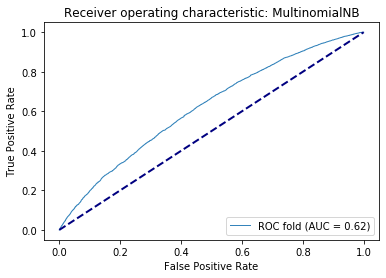

In [47]:

fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_prob], pos_label=1) #nb_predNum

roc_auc = auc(fpr, tpr)
print('roc_auc: ', roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: MultinomialNB')
plt.legend(loc="lower right")
plt.show()

# Model: SGD

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,    max_iter=200, tol=None)

sgd.fit(cv_train, yTrain)
sgd_pred = sgd.predict(cv_test)

print(metrics.classification_report(yTest, sgd_pred))

              precision    recall  f1-score   support

           0       0.46      0.76      0.58      8591
           1       0.66      0.34      0.45     11516

    accuracy                           0.52     20107
   macro avg       0.56      0.55      0.51     20107
weighted avg       0.58      0.52      0.50     20107



fpr [0.       0.237225 1.      ]
tpr [0.         0.34169851 1.        ]
thresholds [2 1 0]
roc_auc:  0.55223675175791


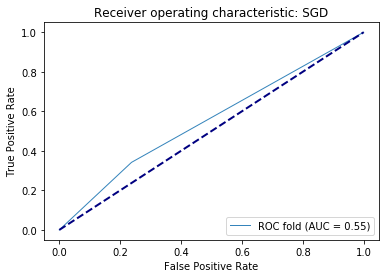

In [49]:
clsType = "SGD"
encoder = LabelEncoder()
# encoder = LabelBinarizer()
encoder.fit(yTest)
yTestNum = encoder.transform(yTest)
# encoder = LabelBinarizer()
# encoder.fit(yTest,classes = ["achievement","affection","bonding","enjoy_the_moment",""])
# yTestNum = encoder.transform(yTest)
from sklearn.metrics import roc_auc_score
sgd_predNum = encoder.transform(sgd_pred)
print_roc(yTestNum, sgd_predNum,clsType)
# print_roc(yTestNum, sgd_predNum)

In [50]:
print(type(yTestNum))
print(type(sgd_predNum))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
# print(yTestNum[1:30])
# print(sgd_predNum[1:30])

print()


# Model: SVM

In [52]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(loss='hinge', penalty='l2', class_weight='balanced', random_state=42)
linear_svm.fit(cv_train, yTrain)

svm_pred = linear_svm.predict(cv_test)
print(metrics.classification_report(yTest, svm_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.44      0.82      0.57      8591
           1       0.62      0.22      0.32     11516

    accuracy                           0.48     20107
   macro avg       0.53      0.52      0.45     20107
weighted avg       0.54      0.48      0.43     20107



fpr [0.       0.237225 1.      ]
tpr [0.         0.34169851 1.        ]
thresholds [2 1 0]
roc_auc:  0.55223675175791


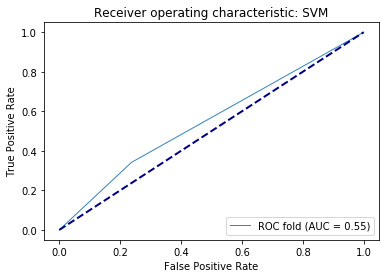

In [53]:
clsType = "SVM"
sgd_predNum = encoder.transform(sgd_pred)
print_roc(yTestNum, sgd_predNum,clsType)

# Model: XGBoost

In [54]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(cv_train , yTrain)

# make predictions for test data
xg_pred = model.predict(cv_test)

print(metrics.classification_report(yTest, xg_pred))

              precision    recall  f1-score   support

           0       0.43      0.97      0.59      8591
           1       0.60      0.04      0.07     11516

    accuracy                           0.43     20107
   macro avg       0.51      0.50      0.33     20107
weighted avg       0.53      0.43      0.29     20107



fpr [0.         0.03212664 1.        ]
tpr [0.         0.03594998 1.        ]
thresholds [2 1 0]
roc_auc:  0.5019116692351815


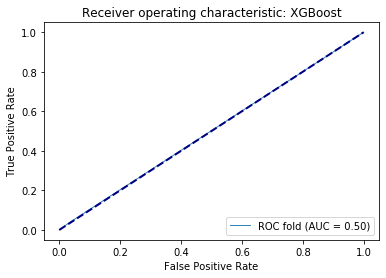

In [55]:
clsType = "XGBoost"
xg_predNum = encoder.transform(xg_pred)
print_roc(yTestNum, xg_predNum,clsType)

# Model: KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(cv_train,yTrain)
knn_predict = knn.predict(cv_test)

In [57]:
from sklearn import metrics
print(metrics.classification_report(yTest, knn_predict))

              precision    recall  f1-score   support

           0       0.42      0.92      0.58      8591
           1       0.51      0.06      0.11     11516

    accuracy                           0.43     20107
   macro avg       0.46      0.49      0.34     20107
weighted avg       0.47      0.43      0.31     20107



fpr [0.         0.07822139 1.        ]
tpr [0.        0.0598298 1.       ]
thresholds [2 1 0]
roc_auc:  0.4908042037659952


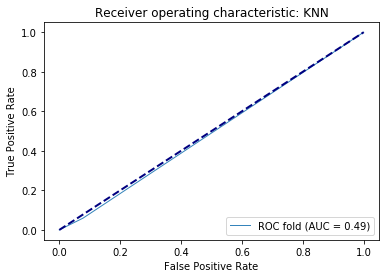

In [58]:
clsType = "KNN"
knn_predNum = encoder.transform(knn_predict)
yTestNum = encoder.transform(yTest)
print_roc(yTestNum, knn_predNum,clsType)

In [0]:
# # print(yTestNum[1:30])
# # print(knn_predNum[3:30])

# z = [x for x in knn_predict]
# z


# Model: LogisticRegression


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.metrics import classification_report
logreg = Pipeline([('clf', LogisticRegression(n_jobs=1, C=1e5)),])
logreg.fit(cv_train, yTrain)

# %%time

y_pred = logreg.predict(cv_test)

print('accuracy %s' % accuracy_score(y_pred, yTest))
print(classification_report(yTest, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.5763167056249068
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      8591
           1       0.64      0.59      0.61     11516

    accuracy                           0.58     20107
   macro avg       0.57      0.57      0.57     20107
weighted avg       0.58      0.58      0.58     20107



fpr [0.         0.44150856 1.        ]
tpr [0.         0.58961445 1.        ]
thresholds [2 1 0]
roc_auc:  0.5740529469982986


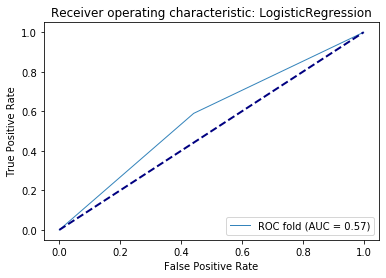

In [60]:
clsType = "LogisticRegression"
Logistic_predNum = encoder.transform(y_pred)
# yTestNum = encoder.transform(yTest)
print_roc(yTestNum, Logistic_predNum,clsType)

# temp